# Wavespectra plugins to read and write Funwave wavemaker spectra
From version **3.9.0** [wavespectra](https://github.com/wavespectra/wavespectra) added support for Funwave spectrum file format

### Funwave format description:
https://fengyanshi.github.io/build/html/wavemaker_para.html

### Wavespectra format description:
https://wavespectra.readthedocs.io/en/latest/conventions.html

### This exercise uses 2D and 1D spectra sample files provided in the Funwave repository:

* [wave2d_frf.txt](https://raw.githubusercontent.com/fengyanshi/FUNWAVE-TVD/master/simple_cases/beach_2d/spectral_data/MATLAB/wave2d_frf.txt)
* [wave1d_frf.txt](https://raw.githubusercontent.com/fengyanshi/FUNWAVE-TVD/master/simple_cases/beach_2d/spectral_data/MATLAB/wave1d_frf.txt)

Wavespectra github repository: https://github.com/wavespectra/wavespectra

Wavespectra docs: https://wavespectra.readthedocs.io/en/latest/


In [1]:
import xarray as xr

xr.set_options(display_style="html");

## Use read_funwave to read 2D and 1D Funwave spectra

In [2]:
from wavespectra import read_funwave

ds1d = read_funwave("data/wave1d_frf.txt")
ds2d = read_funwave("data/wave2d_frf.txt")

## One-dimensional spectrum
* Frequency coordinates in Hz
* Wave spectra in wave energy density (m2/Hz)

In [3]:
ds1d

<xarray.Dataset>
Dimensions:  (freq: 33)
Coordinates:
  * freq     (freq) float64 0.04 0.048 0.055 0.062 ... 0.258 0.265 0.272 0.28
Data variables:
    efth     (freq) float64 0.1236 0.1444 0.3557 0.8921 ... 0.4119 0.3575 0.3426
    tp       float64 10.81

## Two-dimensional spectrum
* Frequency coordinates in Hz
* Direction coordinates in degrees following wavespectra library convention (0-N, CW, coming-from)
* Wave spectra in wave energy density (m2/Hz/degree)

In [4]:
ds2d

<xarray.Dataset>
Dimensions:  (dir: 26, freq: 33)
Coordinates:
  * freq     (freq) float64 0.04 0.048 0.055 0.062 ... 0.258 0.265 0.272 0.28
  * dir      (dir) float64 216.8 221.8 226.8 231.8 ... 326.8 331.8 336.8 341.8
Data variables:
    efth     (freq, dir) float64 0.0009522 0.0009804 ... 0.002546 0.002314
    tp       float64 10.81

## Plotting

### 1D spectra
Using xarray native plotting method

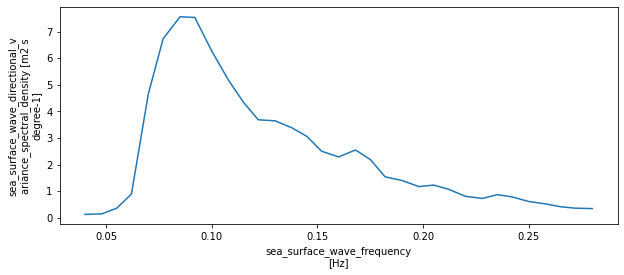

In [5]:
ds1d.efth.plot(figsize=(10, 4));

### 2D spectra
Using xarray native plotting method

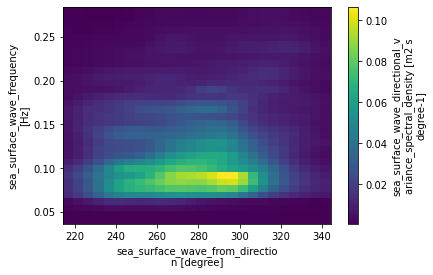

In [6]:
ds2d.efth.plot();

Using wavespectra wrapper around xarray plotting to make polar spectra plot

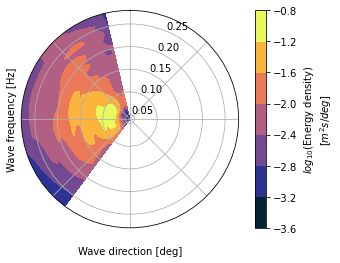

In [7]:
ds2d.spec.plot.contourf(as_log10=True);

## Use to_funwave to write wavespectra dataset into Funwave spectra

### One-dimensional spectrum

In [8]:
ds1d.spec.to_funwave("./funwave_wavespectra_1d.txt")
!head ./funwave_wavespectra_1d.txt

   33    1   - NumFreq NumDir
    11.335   - PeakPeriod
   0.04000   - Freq
   0.04800   - Freq
   0.05500   - Freq
   0.06200   - Freq
   0.07000   - Freq
   0.07700   - Freq
   0.08500   - Freq
   0.09200   - Freq


## Two-dimensional spectrum

In [9]:
ds2d.spec.to_funwave("./funwave_wavespectra_2d.txt")
!head ./funwave_wavespectra_2d.txt

   33   26   - NumFreq NumDir
    11.335   - PeakPeriod
   0.04000   - Freq
   0.04800   - Freq
   0.05500   - Freq
   0.06200   - Freq
   0.07000   - Freq
   0.07700   - Freq
   0.08500   - Freq
   0.09200   - Freq


Note `PeakPeriod` Tp is different than the one in the original file which was calculated as the period corresponding to the maximum energy density in the 2D spectrum matrix. Wavespectra adopts the definition used in WW3 and SWAN spectral wave models with Tp defined as the maximum of a parabolic fit around the peak in the 1D (direction-integrated) spectrum.

## Write multiple spectra
Multiple Funwave spectrum files are written when the dataset is composed by more than one spectrum along any additional dimension (i.e., `time`, `lat`, `lon`, etc).

Here we read a WW3 sample spectra file and write all sites and times as individual Funwave files.

In [10]:
from wavespectra import read_ww3

dset = read_ww3("data/ww3file.nc")
dset

<xarray.Dataset>
Dimensions:  (dir: 24, freq: 25, site: 2, time: 9)
Coordinates:
  * dir      (dir) float32 270.0 255.0 240.0 225.0 ... 330.0 315.0 300.0 285.0
  * freq     (freq) float32 0.04118 0.0453 0.04983 ... 0.3352 0.3687 0.4056
  * site     (site) int32 1 2
  * time     (time) datetime64[ns] 2014-12-01 2014-12-01T12:00:00 ... 2014-12-05
Data variables:
    dpt      (time, site) float32 dask.array<chunksize=(9, 2), meta=np.ndarray>
    efth     (time, site, freq, dir) float32 dask.array<chunksize=(9, 2, 25, 24), meta=np.ndarray>
    lat      (site) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    lon      (site) float32 dask.array<chunksize=(2,), meta=np.ndarray>
    wspd     (time, site) float32 dask.array<chunksize=(9, 2), meta=np.ndarray>
    wdir     (time, site) float32 dask.array<chunksize=(9, 2), meta=np.ndarray>

In [11]:
dset.spec.to_funwave("funwave_wavespectra_ww3.txt")

INFO:wavespectra.output.funwave:Multiple spectra, writing txt files in zip archive funwave_wavespectra_ww3.zip


Wavespectra Creates all individual files within a zip archive named by replacing the extension in filename provided by `.zip`

In [12]:
!ls -l *.zip

-rw-rw-r-- 1 rguedes rguedes 53868 May 30 21:21 funwave_wavespectra_ww3.zip


Each file is named according to the coordinate values of each non-spectral dimension in dataset

In [13]:
!unzip -l funwave_wavespectra_ww3.zip

Archive:  funwave_wavespectra_ww3.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
     8642  2021-05-30 21:21   funwave_wavespectra_ww3-time-2014-12-01T00:00:00.000000000_site-1.txt
     8642  2021-05-30 21:21   funwave_wavespectra_ww3-time-2014-12-01T00:00:00.000000000_site-2.txt
     8642  2021-05-30 21:21   funwave_wavespectra_ww3-time-2014-12-01T12:00:00.000000000_site-1.txt
     8642  2021-05-30 21:21   funwave_wavespectra_ww3-time-2014-12-01T12:00:00.000000000_site-2.txt
     8642  2021-05-30 21:21   funwave_wavespectra_ww3-time-2014-12-02T00:00:00.000000000_site-1.txt
     8642  2021-05-30 21:21   funwave_wavespectra_ww3-time-2014-12-02T00:00:00.000000000_site-2.txt
     8642  2021-05-30 21:21   funwave_wavespectra_ww3-time-2014-12-02T12:00:00.000000000_site-1.txt
     8642  2021-05-30 21:21   funwave_wavespectra_ww3-time-2014-12-02T12:00:00.000000000_site-2.txt
     8642  2021-05-30 21:21   funwave_wavespectra_ww3-time-2014-12-03T00:00:00.000000000_sit

## Clipping directions
Funwave only accounts for directions within the [-90, 90] degrees range (in Funwave directions convention). Directions outside this range are excluded by default from the output Funwave spectrum file. In order to keep the directions in the file set `clip=False` option in `to_funwave` method:

In [14]:
dset.isel(time=0, site=0).spec.to_funwave("funwave-clipped.txt")
dset.isel(time=0, site=0).spec.to_funwave("funwave-nonclipped.txt", clip=False)

### Clipped

In [15]:
ds = read_funwave("funwave-clipped.txt")

dirs = (270 - ds.dir.values) % 360
dirs[dirs > 90] = dirs[dirs > 90] - 360
sorted(dirs)

[-90.0,
 -75.0,
 -60.0,
 -45.0,
 -30.0,
 -15.0,
 0.0,
 15.0,
 30.0,
 45.0,
 60.0,
 75.0,
 90.0]

### Non-clipped

In [16]:
ds = read_funwave("funwave-nonclipped.txt")

dirs = (270 - ds.dir.values) % 360
dirs[dirs > 90] = dirs[dirs > 90] - 360
sorted(dirs)

[-255.0,
 -240.0,
 -225.0,
 -210.0,
 -195.0,
 -180.0,
 -165.0,
 -150.0,
 -135.0,
 -120.0,
 -105.0,
 -90.0,
 -75.0,
 -60.0,
 -45.0,
 -30.0,
 -15.0,
 0.0,
 15.0,
 30.0,
 45.0,
 60.0,
 75.0,
 90.0]

And of course, clipping can also be achieved by selecting specific directions in the xarray wavespectra dataset before saving Funwave file, or by using wavespectra's [split](https://wavespectra.readthedocs.io/en/latest/generated/wavespectra.SpecArray.split.html#wavespectra.SpecArray.split) method.